## Import statements


In [49]:
import math
import random
import matplotlib.pyplot as plt

### Definition of CIty

* This gives the defnition of the city class along with few helper function as defined in the class

In [50]:
class City:
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def distance(self, city):
        ret = math.hypot(self.x - city.x, self.y - city.y)
        return ret

    def __repr__(self):
        ret = "(" + str(self.x) + "," + str(self.y) + ")"
        return ret

### Helper Functions


#### Function to read the cities from the data file

In [51]:
def read_cities(size):
    cities = list()
    file = "test_data/cities_" + str(size) + ".data"
    with open(file, 'r') as handle:
        lines = handle.readlines()
        for line in lines:
            x, y = map(float, line.split())
            cities.append(City(x, y))
    return cities

#### Function to generate city using the city class and path_cost is to calculate and return the cost of the path

In [55]:
def generate_cities(size):
    ret = []
    for _ in range(size):
        ret.append(City(x=int(random.random() * 1000), y=int(random.random() * 1000)))
    return ret

def path_cost(route):
    ret = []
    for index,city in enumerate(route):
        ret.append(city.distance(route[index - 1]))
    return sum(ret)


### Simulated Annealing Class 
* Class to implement the Simulated Annealing algorithm by making use of the CIty class to defined the city objects in the algorithm

In [64]:
class SimAnneal(object):
    def __init__(self, cities, temperature=-1, alpha=-1, stopping_temperature=-1, stopping_iter=-1):
        self.cities = cities
        self.num_cities = len(cities)
        self.temperature = temperature
        if temperature == -1 :
            self.temperature = math.sqrt(self.num_cities)
        self.T_save = self.temperature
        self.alpha = alpha
        if alpha == -1:
            self.alpha = 0.999

        self.stopping_temperature = stopping_temperature
        if stopping_temperature == -1:
            self.stopping_temperature = 1e-8        
        
        self.stopping_iter = stopping_iter 
        if stopping_iter == -1:
            self.stopping_iter = 100000
            
        self.iteration = 1
        self.route = None
        self.best_fitness = float("Inf")
        self.progress = list()
        self.cur_cost = None

    def greedy_solution(self):
        start_node = random.randint(0, self.num_cities)  # start from a random node
        unvisited = self.cities[:]
        del unvisited[start_node]
        route = [cities[start_node]]
        while len(unvisited):
            index, nearest_city = min(enumerate(unvisited), key=lambda item: item[1].distance(route[-1]))
            route.append(nearest_city)
            del unvisited[index]
        current_cost = path_cost(route)
        self.progress.append(current_cost)
        return route, current_cost

    def accept_probability(self, candidate_fitness):
        return math.exp(-abs(candidate_fitness - self.cur_cost) / self.temperature)

    def accept(self, guess):
        guess_cost = path_cost(guess)
        if guess_cost < self.cur_cost:
            self.cur_cost, self.route = guess_cost, guess
            if guess_cost < self.best_fitness:
                self.best_fitness, self.route = guess_cost, guess
        else:
            if random.random() < self.accept_probability(guess_cost):
                self.cur_cost, self.route = guess_cost, guess

    def run(self):
        self.route, self.cur_cost = self.greedy_solution()
        while self.temperature >= self.stopping_temperature and self.iteration < self.stopping_iter:
            guess = list(self.route)
            left_index = random.randint(2, self.num_cities - 1)
            right_index = random.randint(0, self.num_cities - left_index)
            guess[right_index: (right_index + left_index)] = reversed(guess[right_index: (right_index + left_index)])
            self.accept(guess)
            self.temperature *= self.alpha
            self.iteration += 1
            self.progress.append(self.cur_cost)

        print("Best fitness obtained: ", self.best_fitness)

    def visualize_routes(self):
        title = 'simulated annealing TSP'
        cities = self.route
        fig = plt.figure()
        fig.suptitle(title)
        x_list, y_list = [], []
        for city in cities:
            x_list.append(city.x)
            y_list.append(city.y)
        x_list.append(cities[0].x)
        y_list.append(cities[0].y)

        plt.plot(x_list, y_list, 'ro')
        plt.plot(x_list, y_list, 'g')
        plt.show(block=True)

    def plot_learning(self):
        fig = plt.figure(1)
        plt.plot([i for i in range(len(self.progress))], self.progress)
        plt.ylabel("Distance")
        plt.xlabel("Iterations")
        plt.show(block=False)


Best fitness obtained:  6906.041484863388


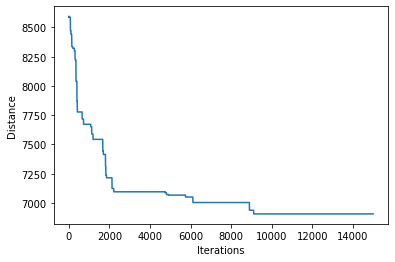

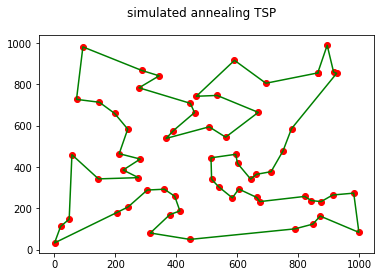

In [65]:
cities = read_cities(64)
sa = SimAnneal(cities, stopping_iter=15000)
sa.run()
sa.plot_learning()
sa.visualize_routes()